# Notebook 06: modules, np.where, np.array, redshift, Hubble expansion, SQL query, Sloan Digital Sky Survey database, histograms
by Rachel Langgin \\
March 2022 and July 2024 \\
Haverford College and University of Nevada, Las Vegas \\

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Goals

* You get a checkpoint of where you are in the class and what work you need to be doing with the TAs
* understand modules
* Learn about the expansion of the universe
* redshift
* Doppler Shift <br>
* Learn about taking "slices" of data
* Be able to make histograms and understand what those are

# Functions Review

In [ ]:
# This is slightly different from how I defined it previously, but it does the same thing
def f(x):   # this is also a valid way to define the same function
    y=x*x
    return (y)

In [ ]:
a=2
b=f(a)  # This is where I "called" the function "f"
print("I called the function on the number %8.3f, and it returned %d" %(a,b)) # This is the fancy print statement
# want you to learn.

I called the function on the number    2.000, and it returned 4


In [ ]:
def add10(x):  # This function adds 10 to a number
    x += 10     # The same as x = x+10
    return(x)

In [ ]:
for s in range(5):
    print(add10(s))

10
11
12
13
14


# Now let's read in a dataset that lives in this google folder

In [ ]:
import pandas as pd  # import pandas module and nickname it pd
from google.colab import drive
# drive.mount("/content/drive") # this line only has to be run once
!pwd
stars = pd.read_csv('/content/drive/MyDrive/UNLV/research!/projects/GW_Explorer_A_Beginners_Guide/Beginning_Python_Notebooks/stars_corrected.csv') # Your path will likely be different
stars

/content


,StarID,Hip,HD,RA,Dec,Distance,Mag,AbsMag,Spectrum,ColorIndex
0,0,1,224690,0.000253,-19.498837,45.662100,9.27,5.972221,K3V,0.999
1,1,2,224699,0.000334,38.859286,355.871886,6.61,-1.146468,B9,-0.019
2,2,3,224707,0.000559,-51.893546,129.032258,8.06,2.506509,F0V,0.370
3,3,4,224705,0.000664,-40.591224,348.432056,8.55,0.839409,G8III,0.902
4,4,5,224708,0.002356,36.585938,207.900208,8.59,2.000725,G5,1.067
5,5,6,224717,0.002417,-50.867074,92.936803,8.59,3.749061,F6V,0.489
6,6,7,224720,0.002486,46.940002,233.100233,7.34,0.502286,A2,0.081
7,7,8,224715,0.002728,-35.960225,246.305419,8.43,1.472630,K4III,1.484
8,8,9,224728,0.002779,-22.594681,286.532951,8.80,1.514127,K0III,1.128


In [ ]:
# print(stars.Dec)
stars[3:3]

,StarID,Hip,HD,RA,Dec,Distance,Mag,AbsMag,Spectrum,ColorIndex


# Modules (1:25)
* The best idea is to put the "import" statements at the top of your workbook as I did.
* Modules are basically collections of functions that you can use without having to define them yourself.
* For example, someone figured out that it would be nice to have a function that returned the average of an array and defined it as part of the "numpy" group of functions. (Numpy is short for Numerical Python)
* The import statements "import numpy as np" tell Python that you plan on using that group of functions (in this case the numpy group) in the workbook, and that you're giving them a nickname (in this case "np")
* To use the functions you use the nickname, "np", or "plt", or "pd" and then a period "." and then the name of the function you want to use.
* So for example to use numpy's mean function, you say ```np.mean(x)``` where ```x``` is the name of an array.

In class what I did was show you the following statement before and after importing the module "np".  If you don't ```import numpy as np``` before this statement, then you get an error message saying "np" is not defined.

In [ ]:
# Show before and after importing modules
x = np.arange(0,100,2)  # first argument is starting number, second is ending number, third is step size

In [ ]:
x

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Now that we've imported those modules, we can use them. And do a review of reading in "comma separated values" aka csv tables like we did on Tuesday.
Here's a weather table to play with.


In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/UNLV/research!/projects/GW_Explorer_A_Beginners_Guide/Beginning_Python_Notebooks/KCLT.csv')

In case you're interested, here's how I got the weather file:
Go to https://www.dataquest.io/blog/free-datasets-for-projects/  
    * Click on US Weather History (or a different dataset)
    * Click on KCLT.csv
    * Click on "raw"
    * File-> Save-as, and save it on your computer
    * Import it into your Jupyter notebook area

In [ ]:
weather

,date,actual_mean_temp,actual_min_temp,actual_max_temp,average_min_temp,average_max_temp,record_min_temp,record_max_temp,record_min_temp_year,record_max_temp_year,actual_precipitation,average_precipitation,record_precipitation
0,2014-7-1,81,70,91,67,89,56,104,1919,2012,0.00,0.10,5.91
1,2014-7-2,85,74,95,68,89,56,101,2008,1931,0.00,0.10,1.53
2,2014-7-3,82,71,93,68,89,56,99,2010,1931,0.14,0.11,2.50
3,2014-7-4,75,64,86,68,89,55,99,1933,1955,0.00,0.10,2.63
4,2014-7-5,72,60,84,68,89,57,100,1967,1954,0.00,0.10,1.65
5,2014-7-6,74,61,87,68,89,57,99,1964,1948,0.00,0.10,1.95
6,2014-7-7,79,67,91,68,89,55,100,1972,1954,0.00,0.11,2.37
7,2014-7-8,83,72,94,68,89,58,101,1892,2010,0.00,0.11,1.87
8,2014-7-9,80,71,89,68,89,57,101,1891,1986,0.15,0.12,3.71
9,2014-7-10,78,71,85,68,89,53,101,1961,1926,0.00,0.11,2.45


In [ ]:
weather.actual_min_temp

0      70
1      74
2      71
3      64
4      60
5      61
6      67
7      72
8      71
9      71
10     68
11     67
12     69
13     74
14     67
15     66
16     63
17     70
18     66
19     65
20     70
21     72
22     69
23     71
24     68
25     66
26     70
27     68
28     62
29     63
       ..
335    66
336    64
337    64
338    61
339    59
340    62
341    70
342    69
343    67
344    69
345    68
346    71
347    72
348    68
349    68
350    69
351    73
352    74
353    72
354    71
355    71
356    65
357    73
358    75
359    74
360    70
361    71
362    66
363    59
364    71
Name: actual_min_temp, Length: 365, dtype: int64

In [ ]:
len(weather.actual_min_temp)

365

In [ ]:
# Mean, max, min
min(weather.actual_min_temp)


7

In [ ]:
max(weather.actual_mean_temp)

88

In [ ]:
np.mean(weather.actual_max_temp)

71.63013698630137

Text(0,0.5,'mean temperature')

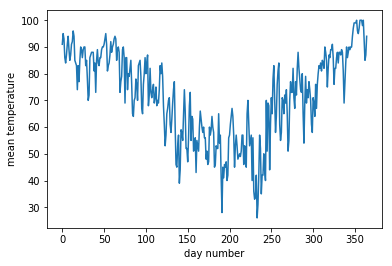

In [ ]:
plt.plot(weather.actual_max_temp)
# Labeling axes on plots
plt.xlabel("day number")
plt.ylabel("mean temperature")


### Short digression into range vs np.arange
There's a "built-in" range function that you've been using.  And numpy also has a range function.  They operate on the same arguments, but the output is a little different.  The three arguments are start, stop, and step.

In [ ]:
x = np.arange(100, 0, -7)

In [ ]:
x

array([100,  93,  86,  79,  72,  65,  58,  51,  44,  37,  30,  23,  16,
         9,   2])

In [ ]:
y = range(0,100,2)

In [ ]:
y

range(0, 100, 2)

# np.where (1:40)
```np.where()``` is one of my favorite functions. It picks out rows in a table according to some criterion that you give it.  Let me show you an example.  I'll read in the same stars table we used earlier.

In [ ]:
stars = pd.read_csv('/content/drive/MyDrive/UNLV/research!/projects/GW_Explorer_A_Beginners_Guide/Beginning_Python_Notebooks/stars_corrected.csv')

In [ ]:
stars

,StarID,Hip,HD,RA,Dec,Distance,Mag,AbsMag,Spectrum,ColorIndex
0,1,2,224690,0.000253,-19.498837,45.662100,9.27,5.972221,K3V,0.999
1,2,3,224699,0.000334,38.859286,355.871886,6.61,-1.146468,B9,-0.019
2,3,4,224707,0.000559,-51.893546,129.032258,8.06,2.506509,F0V,0.370
3,4,5,224705,0.000664,-40.591224,348.432056,8.55,0.839409,G8III,0.902
4,5,9,224708,0.002356,36.585938,207.900208,8.59,2.000725,G5,1.067
5,6,10,224717,0.002417,-50.867074,92.936803,8.59,3.749061,F6V,0.489
6,7,11,224720,0.002486,46.940002,233.100233,7.34,0.502286,A2,0.081
7,8,12,224715,0.002728,-35.960225,246.305419,8.43,1.472630,K4III,1.484
8,9,13,224728,0.002779,-22.594681,286.532951,8.80,1.514127,K0III,1.128


In [ ]:
""" Recall that if we want to select a particular column, that we can specify
it by saying the name of the table, in this case "stars" and then a dot and then the name of the column."""
stars.RA

0    0.000253
1    0.000334
2    0.000559
3    0.000664
4    0.002356
5    0.002417
6    0.002486
7    0.002728
8    0.002779
Name: RA, dtype: float64

## Repackaging the columns as numpy arrays
This is the part that's hardest for me to explain. You'll use a lot of functions from the "numpy" collection, aka module, in this class.  Numpy functions work best on numpy arrays. Sometimes numpy functions work on other kinds of arrays, but sometimes they don't, so I just get in the habit of "recasting" or repackaging everything as a numpy array.

In [ ]:
# Create some less complicatedly-named arrays
# Repackaging of my lists of numbers into "numpy" format
mag = np.array(stars.AbsMag)
ra = np.array(stars.RA)
dec = np.array(stars.Dec)

Notice that cell above also made my columns easier to work with, because their names are shorter.  That's also something I do commonly.

In [ ]:
# First let's make sure we understand what I just did in the repackaging.  Notice it's still a list of the same
# numbers, but it looks a little different.
ra

array([0.00025315, 0.00033386, 0.00055878, 0.00066435, 0.00235612,
       0.00241687, 0.00248646, 0.00272783, 0.00277864])

In [ ]:
# Here's how you use np.where    "desind" is short for desired indices.  You can think
# of it as row numbers,
# and you can name it something else if you want.  "rows" might be a nice name.
desind = np.where(mag<1)   # Punchline np.where gets you row numbers, or indices

In [ ]:
# What is desind?  Let's find out.
desind

(array([1, 3, 6]),)

In [ ]:
desind[0]

array([1, 3, 6])

So rows 1, 3 and 6 are the three rows where ```stars.AbsMag``` is less than 1.   You can confirm that by looking at the table above.

In [ ]:
# Notice the len() function will count them for you.
len(desind[0])

3

The reason you have to say ```[0]``` at the end of desind is a little irritating. np.where actually returns what's called a "tuple" which means the thing it returns could have more than one number (it could have mulTUPLE numbers), one for each dimension of array.  You only have a one-dimensional array, so it only returns one number,
but it's still ready for more numbers.  Do you see that comma after ```[1, 3, 6]),``` two cells above here?  That comma means it's prepared to have a second dimension. ```len``` is not a numpy function, so it can't really deal with that missing dimension.  If you specify that you want the 0th column of desind by saying ```[0]``` len can handle it.  The other way of dealing with it is to use ```np.size``` instead:

In [ ]:
np.size(desind)

3

Remember that I said that numpy functions work best with numpy arrays.  That's a good example.

In [ ]:
# To get the value of the magnitude in those rows, you say
mag[desind]

array([-1.1464684 ,  0.83940948,  0.50228646])

In [ ]:
# You can also get the value of RA in those rows, by saying..

ra[desind]
# This is the real REAL power of np.where - to pick out values from one column
# in the table based on criteria from other rows.

array([0.00033386, 0.00066435, 0.00248646])

# Crash course in Doppler shifting and the expansion of the universe (1:50)

# What is redshift?
Short version: Redshift is the velocity at which an object is moving away from you, divided by the speed of light.

z = v/c

c is the speed of light
z is redshift

So if an object is moving away from you at the speed of light, it's redshift is...... (Answer is 1)

So most redshifts are really small.

# What does that have to do with Rachel swinging that crazy thing over her head?
You actually observe Doppler shifts every day.  I hear them most often in the summer when a car with the radio blasting drives by me. The pitch changes as it goes by. As the car is approaching the pitch is higher than when it's moving away. If you listen for it you can hear it.  Same with sirens - you'll hear the tone change. Same with watching car races (I realize this is not a common thing - but it happens in the movies all the time!). When a car speeds by you the sound its tires make is higher when it's approaching than when it's moving away.  This is all because the waves (sound waves or light waves) get squished shorter as the object is approaching, and they get stretched longer as the object is moving away.

# Okay I get that a redshift is the same as a Doppler Shift, but why is it called a redshift?
Well the thing is that all the galaxies in the universe are moving away from us, by virtue of the Hubble expansion (which is what we're talking about next.) So if an object emits light in the yellow part of the spectrum (like our sun for example) as it moves away the wavelengths will get longer, and we'll observe the sun to be redder than it actually is (because red light is longer wavelength than blue.)

# What is Hubble's law?
distance= redshift*(speed of light)/(Hubble's constant)

This is how we usually write it.

$d={zc}/{H_0}$

Another way to write it is:

$d = v/H_0$

(where $z$ is the symbol we usually use for redshift)

# What is Hubble's constant?
H = 70 km/s/Mpc <br>
the way I say that is "70 kilometers per second per Megaparsec."

# Wait you lost me!! I understand redshift tells me how fast something is moving away from me, but what does that have to do with distance?

This is where we looked at the exploding apple (below). I tried to convince you that during the explosion different parts of the apple would be imparted with different speeds.  A second after the explosion, whatever was imparted the greatest speed would be farthest away. So distance and velocity are proportional, just like Hubble's Law (above) says.

https://www.youtube.com/watch?v=jyYpUGTgDHI

Hubble's law makes that quantitative.  Hubble's law says that for every 1Mpc (1 Mega parsec is about 3 million light light years) the object is moving 70 km/s away from us.

If an object is 2 Mpc away it's traveling at 140 km/s away from you.
If an object is 3 Mpc away it's traveling at 210 km/s away from you.

# Summary

Summary: We measure Doppler shifts, but we call them redshift.
    We call them redshifts because the objects are always moving away from us, and therefore the light is always shifted toward longer wavelengths.  We call that "redder" because we are sort of obsessed with the visual spectrum of light.
    
Once we measure a redshift, we can use it to calculate a velocity:
$v = cz$
    
Once we measure a velocity, we can use it to calculate a distance.
    
$ d = v/H_0 $
    
$ d = cz/H_0 $
    
Believe it or not, THAT is the easiest way to measure distance in Astronomy
    

# Let's play with these concepts in data (2:05)

Let's actually use the query that you're using in the lab to get a feeling for these things.  This is a query of the Sloan Digital Sky Survey database. You'll be using this in the next two labs.


In [ ]:
# Import Python libraries to work with SciServer
import SciServer.CasJobs as CasJobs # query with CasJobs
import SciServer.SciDrive as SciDrive   # read/write to/from SciDrive
# import SciServer.SkyServer as SkyServer   # show individual objects and generate
    # thumbnail images through SkyServer
print('SciServer libraries imported')

# Import other libraries for use in this notebook.
import numpy as np                  # standard Python lib for math ops
from scipy.misc import imsave       # save images as files
import pandas                       # data manipulation package
import matplotlib.pyplot as plt     # another graphing package
import os                           # manage local files in your Compute containers
print('Supporting libraries imported')

import astroML
from astroML.datasets import fetch_sdss_spectrum
from astropy.io import ascii

# Apply some special settings to the imported libraries
# ensure columns get written completely in notebook
pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings
import warnings
warnings.filterwarnings('ignore')
print('Settings applied')

SciServer libraries imported
Supporting libraries imported
Settings applied


In [ ]:
# Find objects in the Sloan Digital Sky Survey's Data Release 14.
##
# First, store the query in an object called "query"
# This query gets right ascension (ra) from a catalog called SpecPhotoAll (Spectrographic
# and Photometric information) and limits the query to just objects deemed to be galaxies
# with a redshift in between .02 and .5 and with a g-magnitude brighter than 17.
query="""
SELECT ra
FROM SpecPhotoAll
WHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < 17
"""
#Then, query the database. The answer is a table that is being returned to a
# dataframe that we've named right_ascension.
ra = CasJobs.executeQuery(query, "dr14")
ra = (np.array(ra))[:,0]   #We'll learn more about why you need
# this statement later. For now
# I'll just tell you we're converting it from a table into an array.
#DR14 means "Data Release 14" See http://skyserver.sdss.org/dr14

print("SQL query finished.")
print("SQL query returned " + str(len(ra))+ " galaxies")

SQL query finished.
SQL query returned 100724 galaxies


In [ ]:
query

"\nSELECT ra\nFROM SpecPhotoAll\nWHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < 17\n"

Let's do similar queries to get dec and z (cause I want to talk about z)

In [ ]:
query="""
SELECT dec
FROM SpecPhotoAll
WHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < 17
"""
#Then, query the database. The answer is a table that is being returned to a
# dataframe that we've named right_ascension.
dec = CasJobs.executeQuery(query, "dr14")
dec = (np.array(dec))[:,0]   #We'll learn more about why you need
# this statement later. For now
# I'll just tell you we're converting it from a table into an array.
#DR14 means "Data Release 14" See http://skyserver.sdss.org/dr14

print("SQL query finished.")
print("SQL query returned " + str(len(dec))+ " galaxies")

In [ ]:
query="""
SELECT z
FROM SpecPhotoAll
WHERE class = 'galaxy' AND z BETWEEN .02 and .5 AND modelMag_g < 17
"""
#Then, query the database. The answer is a table that is being returned to a
# dataframe that we've named right_ascension.
redshift = CasJobs.executeQuery(query, "dr14")
redshift = (np.array(redshift))[:,0]   #We'll learn more about why you need
# this statement later. For now
# I'll just tell you we're converting it from a table into an array.
#DR14 means "Data Release 14" See http://skyserver.sdss.org/dr14

print("SQL query finished.")
print("SQL query returned " + str(len(redshift))+ " galaxies")

Now I have 3 arrays: ra, dec, and z (where z is redshift)

In [ ]:
plt.plot(ra, dec, ',')

Let's make this a better plot by restricting the range in x and y (using xlim and ylim). And by labeling the axes. And by using green points, because I like green.

In [ ]:
plt.ylim(10,60)
plt.xlim(120,250)
plt.plot(ra, dec, "g,")
plt.xlabel("Right Ascension")
plt.ylabel("Declination")

# Using np.where
Let's use np.where to restrict the redshift range to something less than .03

In [ ]:
desind = np.where(redshift<.03)

# Recall Desind is my short name for desired index.
In this case I only want the row numbers where z < .03

Also recall that desind gives you a list of row numbers or indices, not actually the value of the array.

In [ ]:
# How many are there?
np.size(desind)

In [ ]:
# Someone asked if I could do this with "len" as well. I can, but notice it needs that [0] on the end of it
# to indicate that we only want the 0th piece of the "tuple" that np.where returns.  I consider that an irritating
# feature of np.where, and try to avoid it by using np.size, as I did above.
len(desind[0])

In [ ]:
# We can look at the first 10 members of the list of row numbers where z<.03 by saying
desind[0][0:10]
# The fact that I have to put [0] before the [0:10] is that annoying feature of np.where again.

In [ ]:
# If I want the values of redshift at those row numbers then I use square brackets like this
redshift[desind]

In [ ]:
plt.ylim(10,60)
plt.xlim(120,250)
plt.title("A redshift slice with z between .02 and .03")
plt.plot(ra[desind], dec[desind], "r,")

# Histograms (2:20)
A histogram tells you how your array values are distributed.  For example, based on the fact that redshift is proportional to distance, we might guess that there are more galaxies with low redshifts in the survey, because they're easier to see. (This is called a bias in Astronomy.) Let's see if we're right.

In [ ]:
plt.hist(redshift)

That histogram does affirm what we guessed. There are more values at lower redshifts than at higher ones, but it's kind of a crappy histogram (pardon my language.) Let's make it finer by using the "bins" optional argument to plt.hist:

In [ ]:
plt.hist(redshift, bins=50);

By the way, I put the semi-colon after the command so that it wouldn't print out the values of the arrays it's plotting. Feel free to take the semi-colon away and see what happens. You can use this when various commands are printing stuff you don't care about.

So where would you say the "median" redshift is in this sample?  Median means the redshift below which half the data is, and above which half the data is.  You'll have a pair programming assignment about that on Wednesday!!